# Sanity Checking the Subspace Network Digital Twin

This notebook performs a simulation run with the default parameter set
for a single run. It is meant to provide quick diagnostics on the model
capabilities.



## Part 1. Dependences & Set-up

In [1]:
import sys
sys.path.append('../')

import os

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

from cadCAD_tools import easy_run

pio.renderers.default = "png" # For GitHub rendering

## Part 2. Simulation set-up & execution

In [2]:
from subspace_model.params import INITIAL_STATE
from subspace_model.params import SINGLE_RUN_PARAMS
from subspace_model.params import TIMESTEPS
from subspace_model.params import SAMPLES
from subspace_model.structure import SUBSPACE_MODEL_BLOCKS

default_run_args = (INITIAL_STATE,
                     {k: [v] for k, v in SINGLE_RUN_PARAMS.items()},
                    SUBSPACE_MODEL_BLOCKS,
                    TIMESTEPS,
                    SAMPLES)
sim_df = easy_run(*default_run_args)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 701, 40, 1, 32)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (701, 40, 1, 32)


Initializing configurations:   0%|          | 0/1 [00:00<?, ?it/s]

Execution Method: local_simulations
Execution Mode: single_threaded


Flattening results:   0%|          | 0/9114 [00:00<?, ?it/s]

Total execution time: 0.51s


In [3]:
sim_df.head(5)

,days_passed,delta_days,delta_blocks,circulating_supply,user_supply,issued_supply,sum_of_stocks,block_utilization,dsf_relative_disbursal_per_day,reward_issuance_balance,...,avg_compute_weights_per_tx,std_compute_weights_per_tx,min_compute_weights_per_tx,avg_transaction_size,std_transaction_size,min_transaction_size,avg_transaction_count_per_day,avg_slash_per_day,avg_new_sectors_per_day,std_new_sectors_per_day
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.320000e+09,...,200,500,10,600000,100000,100,14400.0,0.1,1000,500
13,1,1.0,14400.0,1.320000e+07,1.320000e+07,13200000.0,3.000000e+09,0.003884,0.0,1.306800e+09,...,200,500,10,600000,100000,100,14400.0,0.1,1000,500
26,2,1.0,14400.0,2.625463e+07,2.625832e+07,26268000.0,3.000000e+09,0.003935,0.0,1.293732e+09,...,200,500,10,600000,100000,100,14400.0,0.1,1000,500
39,3,1.0,14400.0,3.914243e+07,3.918747e+07,39205320.0,3.000000e+09,0.003549,0.0,1.280795e+09,...,200,500,10,600000,100000,100,14400.0,0.1,1000,500
52,4,1.0,14400.0,5.193417e+07,5.198768e+07,52013266.8,3.000000e+09,0.003375,0.0,1.267987e+09,...,200,500,10,600000,100000,100,14400.0,0.1,1000,500


In [4]:
sim_df.staking_pool_balance

0       0.000000e+00
13      0.000000e+00
26      3.689386e+03
39      4.504445e+04
52      5.350250e+04
            ...     
9061    1.461552e+09
9074    1.460724e+09
9087    1.463612e+09
9100    1.463828e+09
9113    1.469524e+09
Name: staking_pool_balance, Length: 702, dtype: float64

## Part 3. Visualizations

On this section, we'll visualize some base metrics on the simulations results

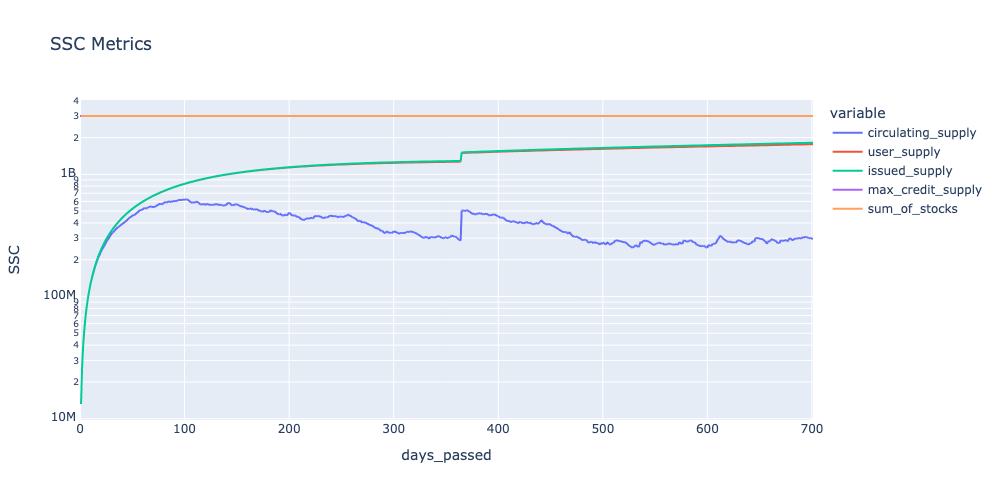

In [5]:
fig = px.line(sim_df, 
        x='days_passed', 
        y=[el for el in sim_df.columns if "supply" in el] + ['sum_of_stocks'],
        title='SSC Metrics',
        labels={'value': 'SSC'},
        log_y=True)
fig.update_layout(width=1000, height=500)
fig.show()

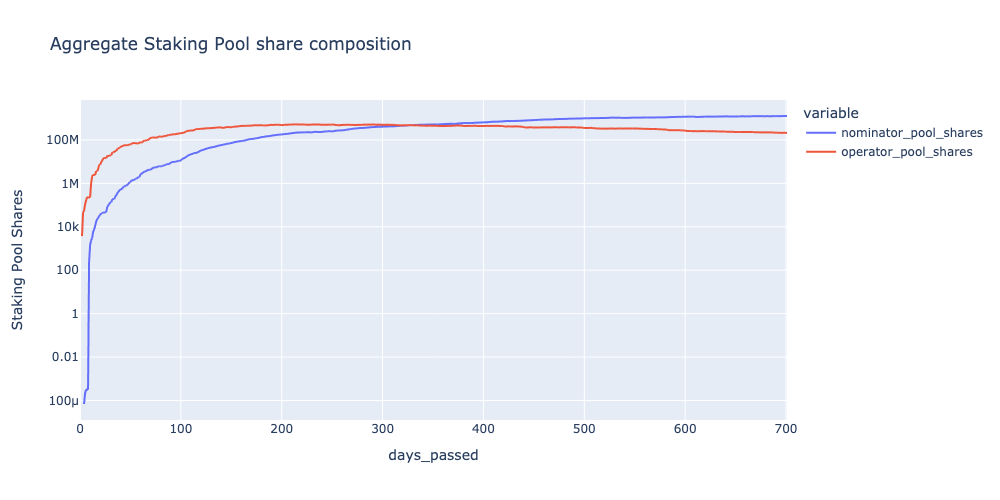

In [6]:
fig = px.line(sim_df, x='days_passed', 
        y=[el for el in sim_df.columns if "shares" in el],
        log_y=True,
        labels={'value': 'Staking Pool Shares'},
        title='Aggregate Staking Pool share composition'
        )
fig.update_layout(width=1000, height=500)
fig.show()

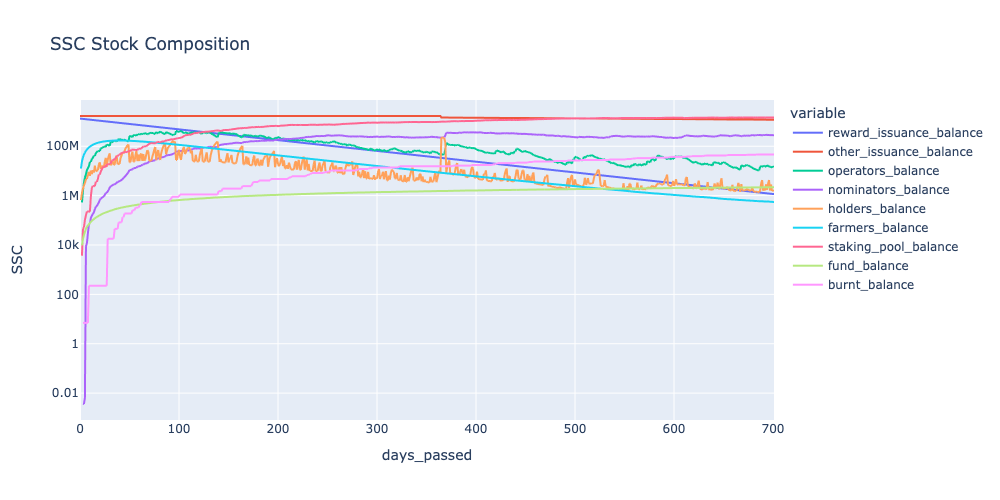

In [7]:
fig = px.line(sim_df, x='days_passed', 
        y=[el for el in sim_df.columns if "_balance" in el],
        title='SSC Stock Composition',
        labels={'value': 'SSC'},
        log_y=True)
fig.update_layout(width=1000, height=500)
fig.show()

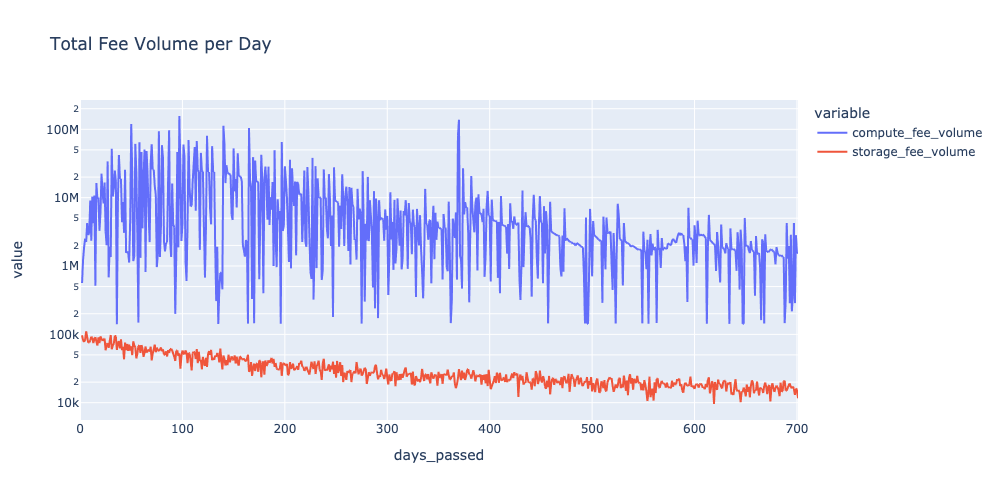

In [8]:
fig = px.line(sim_df, 
        x='days_passed', 
        y=[el for el in sim_df.columns if "volume" in el],
        title='Total Fee Volume per Day',
        log_y=True)
fig.update_layout(width=1000, height=500)
fig.show()

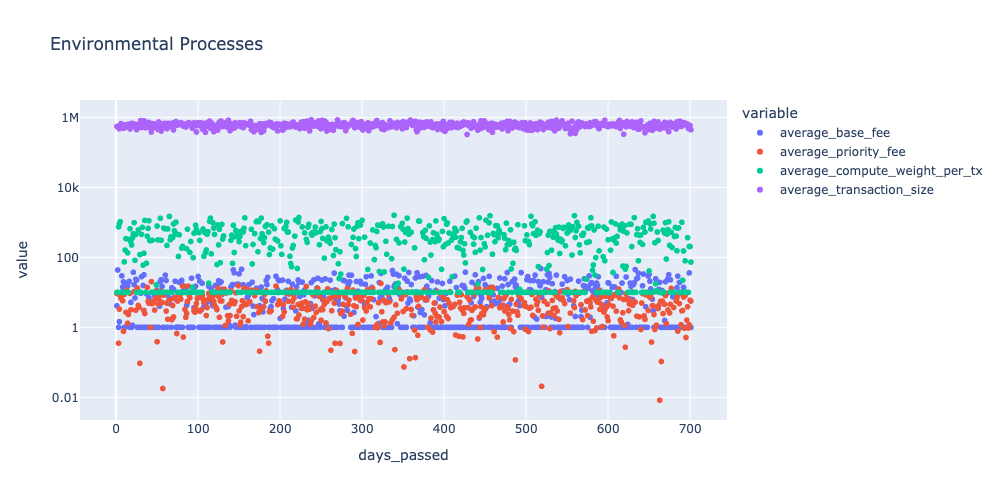

In [9]:
fig_df = sim_df.melt(id_vars=['days_passed'], value_vars=[el for el in sim_df.columns if "average" in el])


fig = px.scatter(fig_df, 
        x='days_passed', 
        y='value',
        color='variable',
        title='Environmental Processes',
        log_y=True)

fig.update_layout(width=1000, height=500)
fig.show()

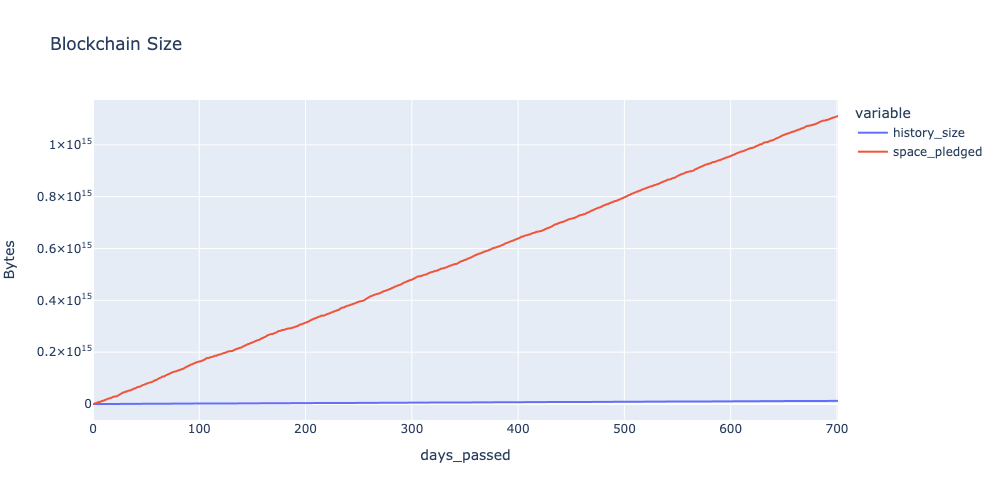

In [10]:
fig = px.line(sim_df, 
        x='days_passed', 
        y=['history_size', 'space_pledged'],
        title='Blockchain Size',
        labels={'value': 'Bytes'})
fig.update_layout(width=1000, height=500)
fig.update_yaxes(matches=None, showticklabels=True)
fig.show()

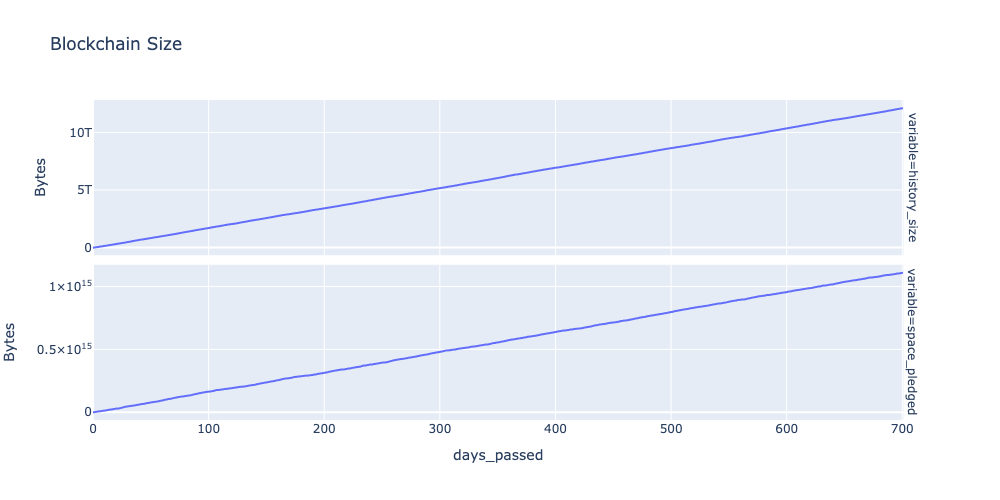

In [11]:
fig_df = sim_df.melt(id_vars=['days_passed'], 
                     value_vars=['history_size', 'space_pledged'])

fig = px.line(fig_df, 
        x='days_passed', 
        y='value',
        facet_row='variable',
        title='Blockchain Size',
        labels={'value': 'Bytes'})
fig.update_layout(width=1000, height=500)
fig.update_yaxes(matches=None, showticklabels=True)
fig.show()

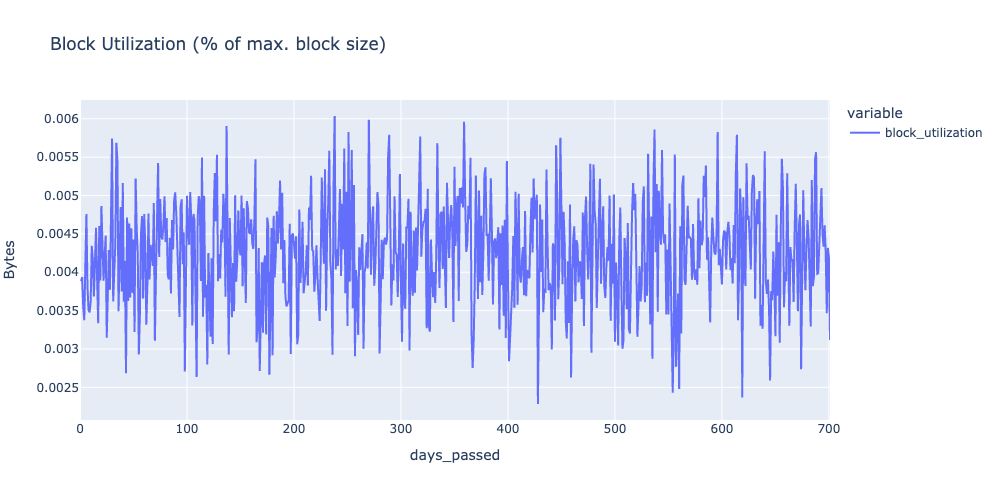

In [12]:
fig = px.line(sim_df, 
        x='days_passed', 
        y=['block_utilization'],
        title='Block Utilization (% of max. block size)',
        labels={'value': 'Bytes'})
fig.update_layout(width=1000, height=500)
fig.show()

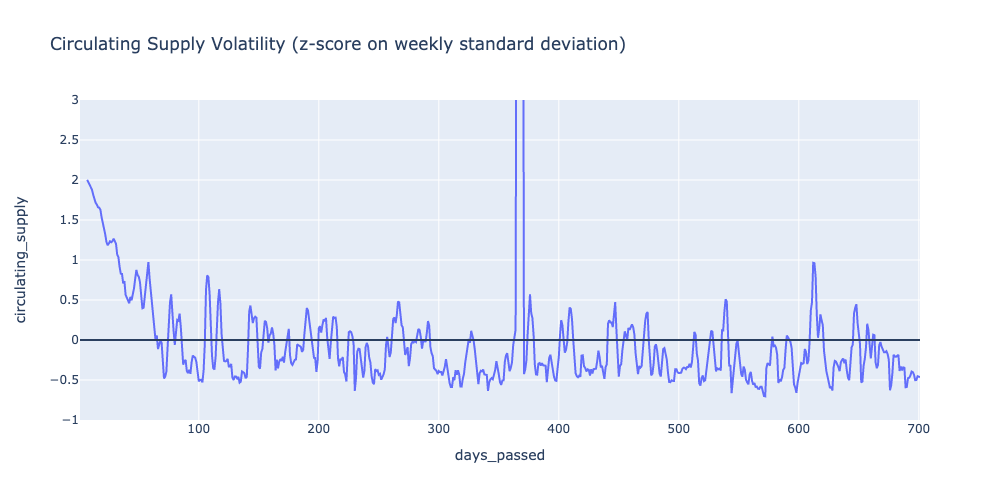

In [48]:
from subspace_model.trajectory_metrics import *
m_df = sim_df.set_index('days_passed')
s = window_volatility(m_df.circulating_supply).reset_index()

fig = px.line(s, 
        x='days_passed', 
        y='circulating_supply',
        title='Circulating Supply Volatility (z-score on weekly standard deviation)')
fig.add_hline(0)
fig.update_layout(width=1000, height=500, yaxis_range=[-1, 3])
fig.show()